# <font color='#2F4F4F'>Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [1]:
# Importing standard libraries

import pandas as pd               # library for data manipulation
import numpy as np                # library for scientific computations
import matplotlib.pyplot as plt   # library for data visualisation 

In [2]:
# Importing our dataset
train_df = pd.read_csv('https://bit.ly/38dSbSb')
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [3]:
# Sample dataset
train_df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
1119,2016-06-15,43.389999,44.380001,43.026001,43.540001,43.540001,14542500


In [4]:
# Statistical summary
train_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [5]:
# Getting our train dataset

train_set = train_df.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [6]:
# Performing Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [7]:
# Creating a dataset with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# Reshaping 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [9]:
# Building the RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
# Initialising the RNN

regressor = Sequential()

# Adding 4 LSTM layers and some Dropout regularisation

regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Dropout regularisation. We set the'return_sequences' is False as we will not add more LSTM layers after this one.
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer.  We set the 'output dimension' is 1 since we are predicting 1 price each time.
regressor.add(Dense(units = 1))

In [11]:
# Compile the RNN 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 68ms/step - loss: 0.0426
Epoch 2/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0086
Epoch 3/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0070
Epoch 4/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0072
Epoch 5/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0068
Epoch 6/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0068
Epoch 7/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0067
Epoch 8/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0062
Epoch 9/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0060
Epoch 11/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0046
Epoch 13/100
38/38 [====

In [19]:
# Getting the Test Dataset
test_df = pd.read_csv('https://bit.ly/3kW8E0K')
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
3,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000
4,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500


In [20]:
# Getting Test Dataset feature values NB: We are using the 'Open' feature
real_stock_price = test_df.iloc[:, 1:2].values
print(real_stock_price)

[[ 88.094002]
 [ 92.279999]
 [ 94.739998]
 [ 99.419998]
 [ 96.358002]
 [ 98.699997]
 [108.851997]
 [105.952003]
 [ 98.75    ]
 [101.522003]
 [106.050003]
 [114.377998]
 [112.849998]
 [114.125999]
 [108.398003]
 [113.697998]
 [115.138   ]
 [126.484001]
 [128.      ]
 [134.738007]
 [176.591995]
 [164.651993]
 [139.983994]
 [146.110001]
 [160.      ]
 [153.757996]
 [155.574005]
 [148.367996]
 [157.444   ]
 [168.320007]
 [184.699997]
 [182.389999]
 [181.395996]
 [167.800003]
 [169.800003]
 [156.5     ]
 [146.      ]
 [125.940002]
 [142.251999]
 [161.      ]
 [152.792007]
 [144.753998]
 [138.      ]
 [121.078003]
 [131.886002]
 [128.039993]
 [116.178001]
 [119.      ]
 [ 93.900002]
 [ 88.001999]
 [ 77.800003]
 [ 74.940002]
 [ 87.639999]
 [ 86.720001]
 [ 95.459999]
 [109.050003]
 [109.477997]
 [101.      ]
 [102.052002]
 [100.25    ]
 [100.800003]
 [ 96.206001]
 [101.900002]
 [102.239998]
 [109.      ]
 [110.839996]
 [112.417999]
 [118.031998]
 [139.794006]
 [148.399994]
 [143.388   ]
 [154.

In [25]:
# Concatenating the train and test datasets for prediction.
# Since we use the previous 60 days' stock prices to predict the next-day price,we will need the 60 days' price before the 1st date in the test dataset.

dataset_total = pd.concat((train_df['Open'],
                           test_df['Open']), axis=0)


# We create the input for prediction, index starting from the date 60 days before the first date in the test dataset.

inputs = dataset_total[len(dataset_total)-len(test_df)-60:].values

# Reshaping the inputs to have only 1 column
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
inputs = sc.transform(inputs)

# Then creating the test data structure just as we did for the train dataset
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],
                    X_test.shape[1], 1))

In [28]:
# Making predictions: Getting the predicted stock price for 2017
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price)

[[0.75180954]
 [1.2326849 ]
 [1.7870471 ]
 [1.397382  ]
 [1.5723438 ]
 [1.7218897 ]
 [1.6358912 ]
 [1.8294413 ]
 [1.758465  ]
 [1.5296395 ]
 [1.6910796 ]
 [1.8739884 ]
 [1.8899088 ]
 [1.7282579 ]
 [1.8385527 ]
 [1.7363298 ]
 [1.8489039 ]
 [1.8722851 ]
 [2.0703971 ]
 [1.9535174 ]
 [2.0680902 ]
 [2.787627  ]
 [1.932823  ]
 [1.5042624 ]
 [2.450403  ]
 [2.6368387 ]
 [1.5420964 ]
 [2.3995707 ]
 [2.42986   ]
 [1.9770885 ]
 [2.572976  ]
 [2.6974542 ]
 [2.0277534 ]
 [2.4623337 ]
 [2.3989708 ]
 [2.2547324 ]
 [2.0108473 ]
 [2.1518078 ]
 [1.7650964 ]
 [2.369604  ]
 [2.5343242 ]
 [1.724396  ]
 [1.9956524 ]
 [2.2724307 ]
 [1.5904171 ]
 [2.0483353 ]
 [2.1207864 ]
 [1.5386157 ]
 [1.8282945 ]
 [1.4876416 ]
 [1.3568909 ]
 [1.2818463 ]
 [1.2734361 ]
 [1.4835999 ]
 [1.4800737 ]
 [1.5281878 ]
 [1.8533323 ]
 [1.7543252 ]
 [1.4340606 ]
 [1.6204553 ]
 [1.7212076 ]
 [1.5869555 ]
 [1.5012789 ]
 [1.7191501 ]
 [1.7313159 ]
 [1.7462413 ]
 [1.7998059 ]
 [1.8115549 ]
 [1.9114349 ]
 [2.3430946 ]
 [2.2039285 ]
 [1.80

In [30]:
# Since we have predicted the scaled values, we reverse those values

predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 44.575977]
 [ 69.68248 ]
 [ 98.62573 ]
 [ 78.28132 ]
 [ 87.41607 ]
 [ 95.22386 ]
 [ 90.73388 ]
 [100.839134]
 [ 97.13346 ]
 [ 85.18648 ]
 [ 93.615265]
 [103.16493 ]
 [103.99614 ]
 [ 95.55634 ]
 [101.314835]
 [ 95.97778 ]
 [101.85527 ]
 [103.076004]
 [113.41943 ]
 [107.31715 ]
 [113.29899 ]
 [150.86601 ]
 [106.23669 ]
 [ 83.86154 ]
 [133.25954 ]
 [142.99335 ]
 [ 85.83685 ]
 [130.60559 ]
 [132.187   ]
 [108.54779 ]
 [139.65909 ]
 [146.15808 ]
 [111.193   ]
 [133.88245 ]
 [130.57426 ]
 [123.04358 ]
 [110.31034 ]
 [117.66988 ]
 [ 97.47968 ]
 [129.04103 ]
 [137.64107 ]
 [ 95.35471 ]
 [109.51701 ]
 [123.967606]
 [ 88.35968 ]
 [112.267586]
 [116.05026 ]
 [ 85.65513 ]
 [100.77926 ]
 [ 82.99377 ]
 [ 76.167274]
 [ 72.2492  ]
 [ 71.8101  ]
 [ 82.78275 ]
 [ 82.59865 ]
 [ 85.11068 ]
 [102.08648 ]
 [ 96.91732 ]
 [ 80.196304]
 [ 89.92797 ]
 [ 95.18825 ]
 [ 88.17895 ]
 [ 83.70577 ]
 [ 95.080826]
 [ 95.716   ]
 [ 96.49526 ]
 [ 99.29186 ]
 [ 99.90528 ]
 [105.12002 ]
 [127.65697 ]
 [120.391106]
 [ 99.

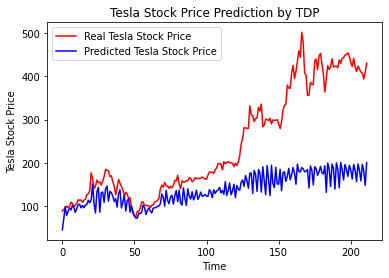

In [31]:
# Visualizing the results

plt.plot(real_stock_price, color='red', label='Real Tesla Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [32]:
# Model Evaluation

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)
print(real_stock_price.mean())

139.79685210561894
240.69449118396224


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

The RNN model achieved an RMSE of 139.79.

The typical average of the stock prices is 240.69 , therefore an RMSE of 139 is quite high. This tells us that the model is not able to predict the tesla stock prices very accurately.
 

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question?

Yes.
#### b) Did we have the right data?
Yes, the right data was used/available for this task

#### c) What can be done to improve the solution?
* Getting more training data
* Increasing the timesteps
* Adding some other indicators
* Adding more LSTM layers
* Adding more neurons in the LSTM layers